In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Bu örnekte boyut(özellik) azaltılarak model eğitilmeye çalışılacaktır. Boyut azaltmanın amacı, veri seti daha düşük boyut ile temsil edilip edilemeyeceğini araştırmaktır.

##### Boyutu azaltarak veriyi daha kolay görselleştirebiliriz. Burada boyut indirmek için "Component Analysis" tekniğini kullanacağız.

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
from sklearn.decomposition import PCA

#PCA: Principal Component Analysis

In [7]:
model_pca = PCA(n_components=2) # 2 boyuta indirmek isteyelim.

In [8]:
model_pca.fit(X_iris)

PCA(n_components=2)

In [9]:
X_2D=model_pca.transform(X_iris)

In [10]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


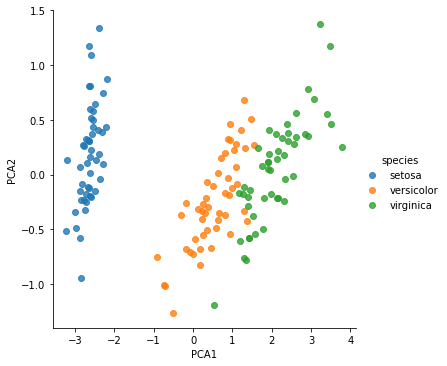

In [12]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

##### Grafikte görüldüğü üzere PCA algoritması 2 değişken ile sınıfları iyi ayırdığını söyleyebiliriz.

##### Şimdi bu veri seti için denetimsiz öğrenme grubundan kümeleme algoritması ile ayırmaya çalışalım. Bunun için güçlü kümeleme algoritması olan "Gaussian Mixture" algoritmasını kullanacağız.

In [13]:
from sklearn.mixture import GaussianMixture

In [15]:
model_gaussmixture = GaussianMixture(n_components=3, covariance_type='full')

In [17]:
model_gaussmixture.fit(X_iris)

#Denetimsiz öğrenme olduğundan y verisini yazmıyoruz.

GaussianMixture(n_components=3)

In [18]:
y_gmm = model_gaussmixture.predict(X_iris)

In [19]:
iris['kumeleme'] = y_gmm

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


##### Şimdi seaborn kütüphanesini kullanarak sonuçların grafiğini çizdirelim.

C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


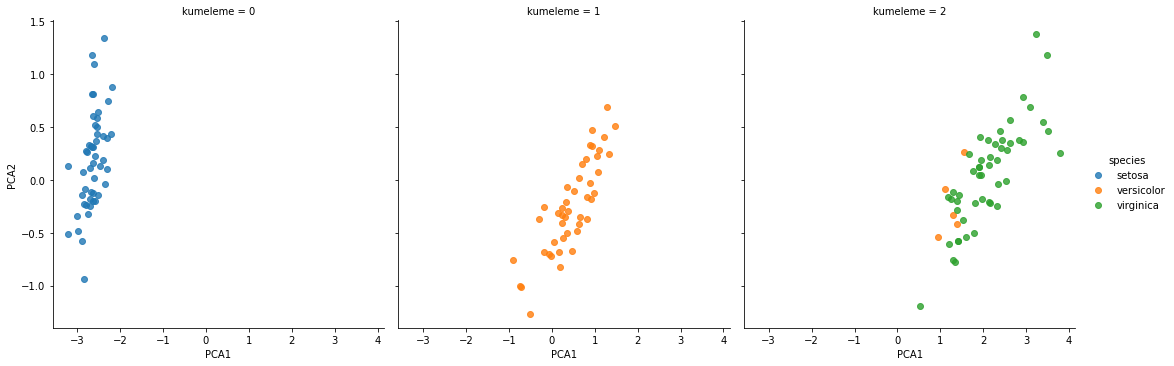

In [21]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, col='kumeleme',
           fit_reg=False)

##### Grafikte görüldüğü üzere "Gaussian Mixture" algoritması sınıfları süper bir şekilde ayırdığını söyleyebiliriz.